## ECE 539 ANN Project: Face Mask Detection
### Utsav Negi, Gahan Sudhir & Vidyuth Mallappa

### **Objective** : To detect whether detected face is wearing a mask or not 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
import random 
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dense,Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
mask_dir = './FMDataset_B/with_mask'
unmask_dir = './FMDataset_B/without_mask'

In [ ]:
def gen_dataset():
    num_images = 5400  # Number of images to be selected from each dataset
    dataset = []
    for i in range(num_images):
        random_file = random.choice(os.listdir(mask_dir))
        print(random_file)
        image_file = os.path.join(mask_dir,random_file)
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resize_img = cv2.resize(image, (100, 100))
        normalized_img = cv2.normalize(resize_img, None, 0, 1, cv2.NORM_MINMAX)
        img_tensor = tf.convert_to_tensor(normalized_img, dtype=tf.float32)
        label = tf.constant([1,0], dtype=tf.float32)
        dataset.append([img_tensor, label])

    for i in range(num_images):
        random_file = random.choice(os.listdir(unmask_dir))
        print(random_file)
        image_file = os.path.join(unmask_dir,random_file)
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resize_img = cv2.resize(image, (100, 100))
        normalized_img = cv2.normalize(resize_img, None, 0, 1, cv2.NORM_MINMAX)
        img_tensor = tf.convert_to_tensor(normalized_img, dtype=tf.float32)
        label = tf.constant([0,1], dtype=tf.float32)
        dataset.append([img_tensor, label])

    return dataset

def gen_test_dataset():
    num_images = 450  # Number of images to be selected from each dataset
    dataset = []
    for i in range(num_images):
        random_file = random.choice(os.listdir('./FMDataset_B/Test/WithMask/'))
        image_file = os.path.join('./FMDataset_B/Test/WithMask/',random_file)
        print(image_file)
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resize_img = cv2.resize(image, (100, 100))
        img_tensor = tf.convert_to_tensor(resize_img, dtype=tf.float32)
        label = tf.constant([1,0], dtype=tf.float32)
        dataset.append([img_tensor, label])
    for i in range(num_images):
        random_file = random.choice(os.listdir('./FMDataset_B/Test/WithoutMask/'))
        image_file = os.path.join('./FMDataset_B/Test/WithoutMask/',random_file)
        print(image_file)
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resize_img = cv2.resize(image, (100, 100))
        img_tensor = tf.convert_to_tensor(resize_img, dtype=tf.float32)
        label = tf.constant([0,1], dtype=tf.float32)
        dataset.append([img_tensor, label])
    return dataset

In [ ]:
dataset = gen_dataset()

with-mask-default-mask-seed9423.png
with-mask-default-mask-seed4891.png
with-mask-default-mask-seed4499.png
with-mask-default-mask-seed2312.png
with-mask-default-mask-seed3669.png
with-mask-default-mask-seed0058.png
with-mask-default-mask-seed8935.png
with-mask-default-mask-seed4975.png
with-mask-default-mask-seed9722.png
with-mask-default-mask-seed2377.png
with-mask-default-mask-seed3970.png
with-mask-default-mask-seed0245.png
with-mask-default-mask-seed1150.png
with-mask-default-mask-seed1378.png
with-mask-default-mask-seed6753.png
with-mask-default-mask-seed7469.png
with-mask-default-mask-seed3436.png
with-mask-default-mask-seed5647.png
with-mask-default-mask-seed0514.png
with-mask-default-mask-seed7502.png
with-mask-default-mask-seed1558.png
with-mask-default-mask-seed9143.png
with-mask-default-mask-seed6947.png
with-mask-default-mask-seed9004.png
with-mask-default-mask-seed0611.png
with-mask-default-mask-seed9372.png
with-mask-default-mask-seed5357.png
with-mask-default-mask-seed3

In [ ]:
test_dataset = gen_test_dataset()

./FMDataset_B/Test/WithMask/Augmented_391_9802469.png
./FMDataset_B/Test/WithMask/Augmented_199_1537768.png
./FMDataset_B/Test/WithMask/Augmented_520_4710062.png
./FMDataset_B/Test/WithMask/Augmented_604_2668181.png
./FMDataset_B/Test/WithMask/556.png
./FMDataset_B/Test/WithMask/Augmented_498_2402579.png
./FMDataset_B/Test/WithMask/741.png
./FMDataset_B/Test/WithMask/1612.png
./FMDataset_B/Test/WithMask/Augmented_450_9264733.png
./FMDataset_B/Test/WithMask/Augmented_689_9677847.png
./FMDataset_B/Test/WithMask/Augmented_559_9982535.png
./FMDataset_B/Test/WithMask/Augmented_58_3749134.png
./FMDataset_B/Test/WithMask/1836.png
./FMDataset_B/Test/WithMask/595.png
./FMDataset_B/Test/WithMask/Augmented_842_5019414.png
./FMDataset_B/Test/WithMask/Augmented_692_4183950.png
./FMDataset_B/Test/WithMask/Augmented_769_667110.png
./FMDataset_B/Test/WithMask/Augmented_561_1833142.png
./FMDataset_B/Test/WithMask/580.png
./FMDataset_B/Test/WithMask/Augmented_296_3645163.png
./FMDataset_B/Test/WithMask/

In [ ]:
X = np.array([data[0] for data in dataset])
y = np.array([data[1] for data in dataset])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.075, shuffle=True, random_state=0)

print('Dimension of X_train:', X_train.shape, ' Dimension of y_train:', y_train.shape)
print('Dimension of X_val:', X_val.shape, ' Dimension of y_val:', y_val.shape)

Dimension of X_train: (9990, 100, 100, 3)  Dimension of y_train: (9990, 2)
Dimension of X_val: (810, 100, 100, 3)  Dimension of y_val: (810, 2)


In [ ]:
model = Sequential()
model.add(Conv2D(16,3, padding='same', input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2, strides=2))
model.add(Conv2D(32,3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(2, strides=2))
model.add(Conv2D(64,3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(2, strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
NUM_EPOCHS = 200
BATCH_SIZE = 20
LR = 0.001

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=LR)
lossFunction = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=opt, loss=lossFunction, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 activation (Activation)     (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                    

In [ ]:
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val,y_val))

Epoch 1/200
500/500 [==============================] - 9s 6ms/step - loss: 0.0184 - accuracy: 0.9931 - val_loss: 3.4150e-06 - val_accuracy: 1.0000
Epoch 2/200
500/500 [==============================] - 3s 5ms/step - loss: 7.5174e-06 - accuracy: 1.0000 - val_loss: 1.8619e-06 - val_accuracy: 1.0000
Epoch 3/200
500/500 [==============================] - 3s 5ms/step - loss: 1.1220e-06 - accuracy: 1.0000 - val_loss: 9.4594e-07 - val_accuracy: 1.0000
Epoch 4/200
500/500 [==============================] - 3s 5ms/step - loss: 2.9111e-07 - accuracy: 1.0000 - val_loss: 4.8708e-07 - val_accuracy: 1.0000
Epoch 5/200
500/500 [==============================] - 3s 6ms/step - loss: 1.6234e-07 - accuracy: 1.0000 - val_loss: 3.5200e-07 - val_accuracy: 1.0000
Epoch 6/200
500/500 [==============================] - 3s 5ms/step - loss: 1.0133e-07 - accuracy: 1.0000 - val_loss: 2.4017e-07 - val_accuracy: 1.0000
Epoch 7/200
500/500 [==============================] - 3s 5ms/step - loss: 6.4604e-08 - accuracy: 

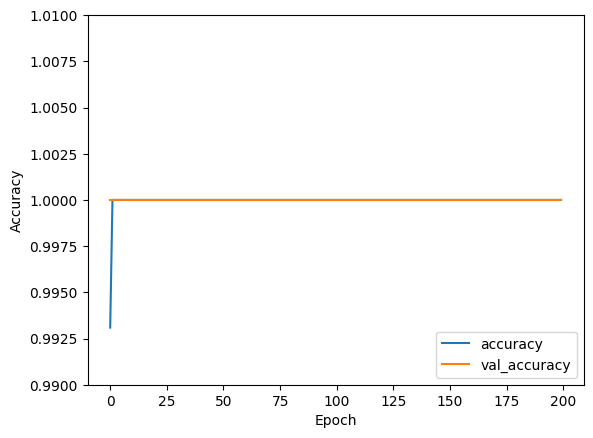

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(ymin=0.99, ymax=1.01)
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

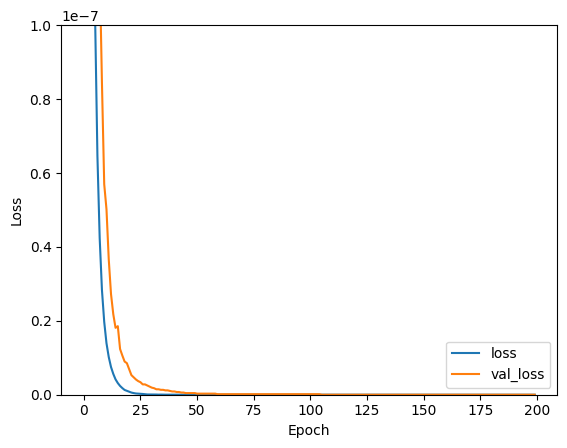

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(ymin=0, ymax=10**-7)
plt.legend(loc='lower right')

In [ ]:
X_test = np.array([data[0] for data in test_dataset])
y_test = np.array([data[1] for data in test_dataset])

29/29 [==============================] - 0s 5ms/step
Area under the curve: 0.8266666666666667
Confusion Matrix:
 [[450   0]
 [156 294]]


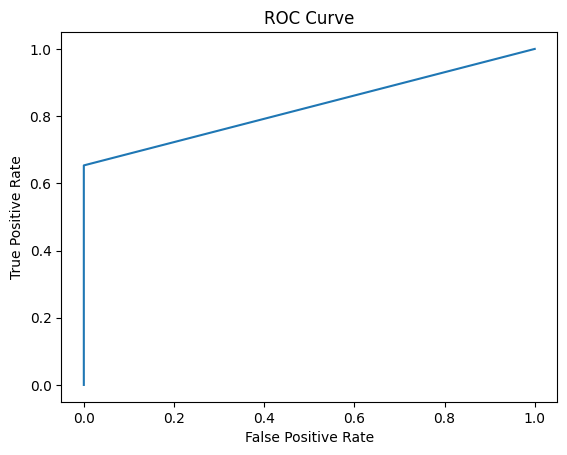

In [ ]:
y_pred = np.round(model.predict(X_test))
fpr, tpr, threshold = roc_curve(y_test[:,0], y_pred[:,0])
roc_auc = roc_auc_score(y_test[:,0], y_pred[:,0])
print('Area under the curve:',roc_auc)
print('Confusion Matrix:\n', confusion_matrix(y_test[:,0], y_pred[:,0]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot(fpr,tpr)

29/29 [==============================] - 0s 4ms/step
Area under the curve: 0.8266666666666667
Confusion Matrix:
 [[294 156]
 [  0 450]]


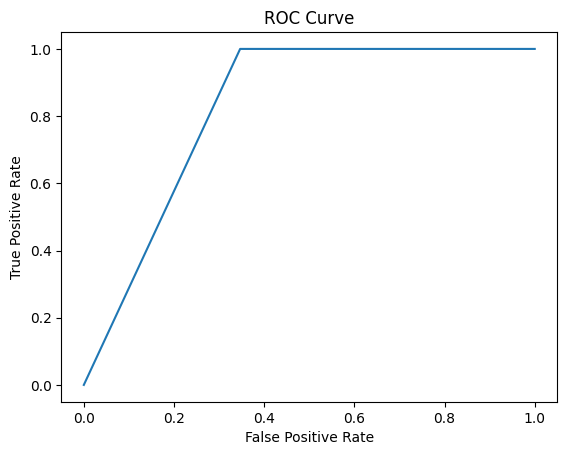

In [ ]:
y_pred = np.round(model.predict(X_test))
fpr, tpr, threshold = roc_curve(y_test[:,1], y_pred[:,1])
roc_auc = roc_auc_score(y_test[:,1], y_pred[:,1])
print('Area under the curve:',roc_auc)
print('Confusion Matrix:\n', confusion_matrix(y_test[:,1], y_pred[:,1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot(fpr,tpr)

In [ ]:
score = model.evaluate(X_test, y_test) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

29/29 [==============================] - 0s 14ms/step - loss: 580.9946 - accuracy: 0.8267
Test loss: 580.9945678710938
Test accuracy: 0.8266666531562805


In [ ]:
model.save("Models/FMClassifier_B")

INFO:tensorflow:Assets written to: Models/FMClassifier_B\assets


INFO:tensorflow:Assets written to: Models/FMClassifier_B\assets
